<div style="text-align: center; padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
  <h1 style="font-size: 2.5em; font-weight: bold; margin: 10px 0; color: #444555;">Air Quality Index - Data Analysis</h1>
</div>

<div style="background-color: #fff8ff; padding: 20px; border-radius: 10px; border: 1px solid #444555; font-family: Arial, sans-serif; color: #333333;">

<h2 style="color: #444555; font-weight: bold;">About Dataset</h2>
<p>This dataset contains ranked air quality measurements for various cities around the world, providing insights into pollution levels across different months of the year. Each entry includes the city name, its rank based on average pollution levels, and monthly average pollution measurements from January to December.</p>

<h3 style="color: #444555; font-weight: bold;">Columns:</h3>
<ul>
  <li><strong>rank:</strong> The rank of the city based on average pollution levels.</li>
  <li><strong>city:</strong> The name of the city along with its country.</li>
  <li><strong>avg:</strong> The average pollution measurement for the year.</li>
  <li><strong>jan - dec:</strong> Monthly average pollution measurements from January to December.</li>
</ul>

<h3 style="color: #444555; font-weight: bold;">Purpose:</h3>
<p>This dataset is designed to facilitate exploratory data analysis (EDA) and modeling related to air quality. It can be utilized by researchers, data scientists, and environmentalists interested in understanding pollution trends, comparing air quality across cities, and developing predictive models for air quality forecasting.</p>

<h3 style="color: #444555; font-weight: bold;">Use Cases:</h3>
<ul>
  <li>Analyzing seasonal trends in air quality.</li>
  <li>Identifying cities with the highest and lowest pollution levels.</li>
  <li>Developing machine learning models for air quality prediction.</li>
  <li>Exploring the impact of pollution on health and the environment.</li>
</ul>

</div>


### 1.Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Data Preprocessing & Understanding

In [2]:
#Read The Data From Both Files
df_raw = pd.read_csv('/kaggle/input/air-quality-index/aqi_data.csv')
df_clean = pd.read_csv('/kaggle/input/air-quality-index/cleaned_interpolated_dataset.csv')

In [3]:
df_raw.head()

,rank,city,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,"Begusarai, India",223,413,337,250,258,209,205,131,115,100,114,298,249
1,2,"Patna, India",212,354,297,225,230,169,183,82,100,84,136,402,277
2,3,"Saharsa, India",207,418,344,238,220,167,149,85,93,91,110,282,292
3,4,"New Delhi, India",205,325,244,167,181,175,124,70,110,91,210,405,352
4,5,"Noida, India",201,304,212,154,187,176,129,70,125,118,237,367,338


In [4]:
df_clean.head()

,rank,city,city_name,Country,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,"Begusarai, India",Begusarai,India,223,413.0,337.0,250.0,258.0,209.0,205.0,131.0,115.0,100.0,114.0,298.0,249.0
1,2,"Patna, India",Patna,India,212,354.0,297.0,225.0,230.0,169.0,183.0,82.0,100.0,84.0,136.0,402.0,277.0
2,3,"Saharsa, India",Saharsa,India,207,418.0,344.0,238.0,220.0,167.0,149.0,85.0,93.0,91.0,110.0,282.0,292.0
3,4,"New Delhi, India",New Delhi,India,205,325.0,244.0,167.0,181.0,175.0,124.0,70.0,110.0,91.0,210.0,405.0,352.0
4,5,"Noida, India",Noida,India,201,304.0,212.0,154.0,187.0,176.0,129.0,70.0,125.0,118.0,237.0,367.0,338.0


In [5]:
df_raw.columns

Index(['rank', 'city', 'avg', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec'],
      dtype='object')

In [6]:
df_clean.columns

Index(['rank', 'city', 'city_name', 'Country', 'avg', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
      dtype='object')

In [7]:
#To Identify the Null Values & Data Types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    5377 non-null   int64 
 1   city    5377 non-null   object
 2   avg     5377 non-null   int64 
 3   jan     5377 non-null   object
 4   feb     5377 non-null   object
 5   mar     5377 non-null   object
 6   apr     5377 non-null   object
 7   may     5377 non-null   object
 8   jun     5377 non-null   object
 9   jul     5377 non-null   object
 10  aug     5377 non-null   object
 11  sep     5377 non-null   object
 12  oct     5377 non-null   object
 13  nov     5377 non-null   object
 14  dec     5377 non-null   object
dtypes: int64(2), object(13)
memory usage: 630.2+ KB


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       5377 non-null   int64  
 1   city       5377 non-null   object 
 2   city_name  5377 non-null   object 
 3   Country    5377 non-null   object 
 4   avg        5377 non-null   int64  
 5   jan        5377 non-null   float64
 6   feb        5377 non-null   float64
 7   mar        5377 non-null   float64
 8   apr        5377 non-null   float64
 9   may        5377 non-null   float64
 10  jun        5377 non-null   float64
 11  jul        5377 non-null   float64
 12  aug        5377 non-null   float64
 13  sep        5377 non-null   float64
 14  oct        5377 non-null   float64
 15  nov        5377 non-null   float64
 16  dec        5377 non-null   float64
dtypes: float64(12), int64(2), object(3)
memory usage: 714.3+ KB


In [9]:
df_raw.shape

(5377, 15)

In [10]:
df_clean.shape

(5377, 17)

In [11]:
#Print All Country Name
df_clean['Country'].unique()

array(['India', 'China', 'Ukraine', 'Nepal', 'Bangladesh', 'Chad', 'Iran',
       'Pakistan', 'Kuwait', 'Mongolia', 'Russia', 'Tajikistan', 'Laos',
       'South Africa', 'Turkey', 'United Arab Emirates', 'Burkina Faso',
       'Thailand', 'Vietnam', 'Kazakhstan', 'Kyrgyzstan', 'Senegal',
       'Montenegro', 'Egypt', 'Mali', 'Nigeria', 'Jordan', 'Rwanda',
       'Mexico', 'Chile', 'North Korea', 'Uganda', 'Indonesia', 'Qatar',
       'Macedonia', 'Israel', 'Saudi Arabia', 'Bosnia And Herzegovina',
       'Belarus', 'Uzbekistan', 'Armenia', 'Serbia', 'Iraq',
       'South Korea', 'Ethiopia', 'Congo (Kinshasa)', 'Austria',
       'Bahrain', 'United States', 'Turkmenistan', 'Zambia', 'Lebanon',
       'Croatia', 'Greece', 'Taiwan', 'Brazil', 'Romania', 'Cameroon',
       'Madagascar', 'El Salvador', 'Georgia', 'Kosovo', 'Burma',
       'Colombia', 'Czechia', 'Argentina', 'Canada', 'Malta', 'Poland',
       'Sri Lanka', 'Cyprus', 'Spain', 'Ireland', 'Italy', 'Bulgaria',
       'Gabon', 'S

In [12]:
#Identify Number Of Countires
len(df_clean['Country'].unique())

141

In [13]:
#Creating variable months for further Data Processing
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_clean[['city_name']+months]

,city_name,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,Begusarai,413.0,337.0,250.000000,258.000000,209.000000,205.000000,131.0,115.000000,100.000000,114.000000,298.0,249.0
1,Patna,354.0,297.0,225.000000,230.000000,169.000000,183.000000,82.0,100.000000,84.000000,136.000000,402.0,277.0
2,Saharsa,418.0,344.0,238.000000,220.000000,167.000000,149.000000,85.0,93.000000,91.000000,110.000000,282.0,292.0
3,New Delhi,325.0,244.0,167.000000,181.000000,175.000000,124.000000,70.0,110.000000,91.000000,210.000000,405.0,352.0
4,Noida,304.0,212.0,154.000000,187.000000,176.000000,129.000000,70.0,125.000000,118.000000,237.000000,367.0,338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,Hyvinkaa,2.5,6.5,0.928571,3.714286,0.000000,0.000000,0.0,0.000000,0.000000,0.764706,7.0,10.0
5373,Joensuu,4.0,7.0,1.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.823529,0.0,0.0
5374,Mikkeli,3.0,5.0,1.000000,2.666667,0.333333,0.333333,0.0,0.333333,0.333333,0.882353,6.0,7.0
5375,Tornio,2.0,3.0,1.000000,1.333333,0.666667,0.666667,0.0,0.666667,0.666667,0.941176,6.0,6.0


<div style="background-color: #fff8ff; padding: 20px; border-radius: 10px; border: 1px solid #444555; font-family: Arial, sans-serif; color: #333333;">The scatter plot below confirms that lower AQI levels correlate with higher ranks. This intuitive relationship, visualized effectively, eliminates the need to manually parse through the dataset of over 5000 rows. The visualization simplifies complex data into actionable insights, aiding in quick interpretation.</div>

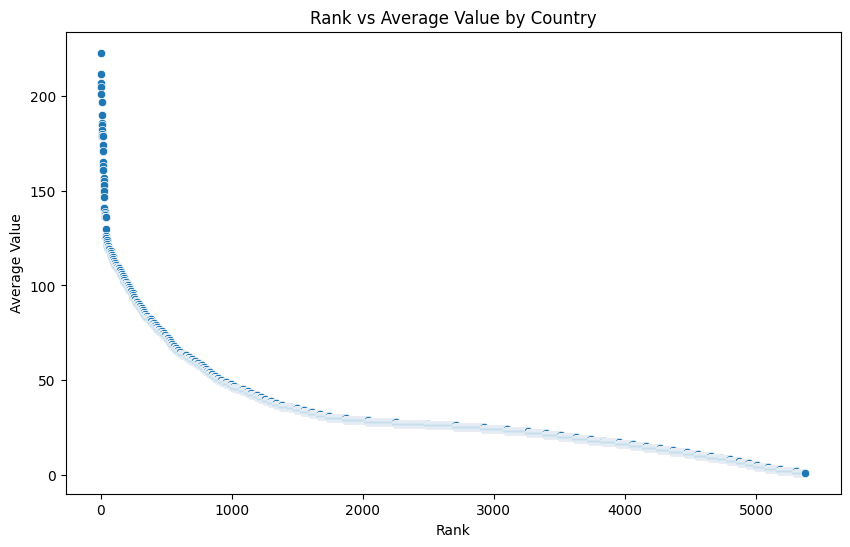

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=df_clean, x='rank', y='avg')

# Add a title and labels
plt.title('Rank vs Average Value by Country')
plt.xlabel('Rank')
plt.ylabel('Average Value')

# Show the plot

plt.show()

In [15]:
#Store India Related Data
india_data = df_clean[df_clean['Country'] == 'India']

In [16]:
#Check the India Data
print(india_data)

      rank              city  city_name Country  avg    jan    feb    mar  \
0        1  Begusarai, India  Begusarai   India  223  413.0  337.0  250.0   
1        2      Patna, India      Patna   India  212  354.0  297.0  225.0   
2        3    Saharsa, India    Saharsa   India  207  418.0  344.0  238.0   
3        4  New Delhi, India  New Delhi   India  205  325.0  244.0  167.0   
4        5      Noida, India      Noida   India  201  304.0  212.0  154.0   
...    ...               ...        ...     ...  ...    ...    ...    ...   
3629  3630   Handwara, India   Handwara   India   19   20.0   15.0   17.0   
3630  3631     Kulgam, India     Kulgam   India   19   17.0   14.0   16.0   
3789  3790       Kulu, India       Kulu   India   18   23.0   18.0   14.0   
3939  3940     Manali, India     Manali   India   17   32.0   17.0   13.0   
4410  4411      Sopur, India      Sopur   India   12   14.0    9.0   11.0   

        apr    may    jun    jul    aug    sep    oct    nov    dec  
0    

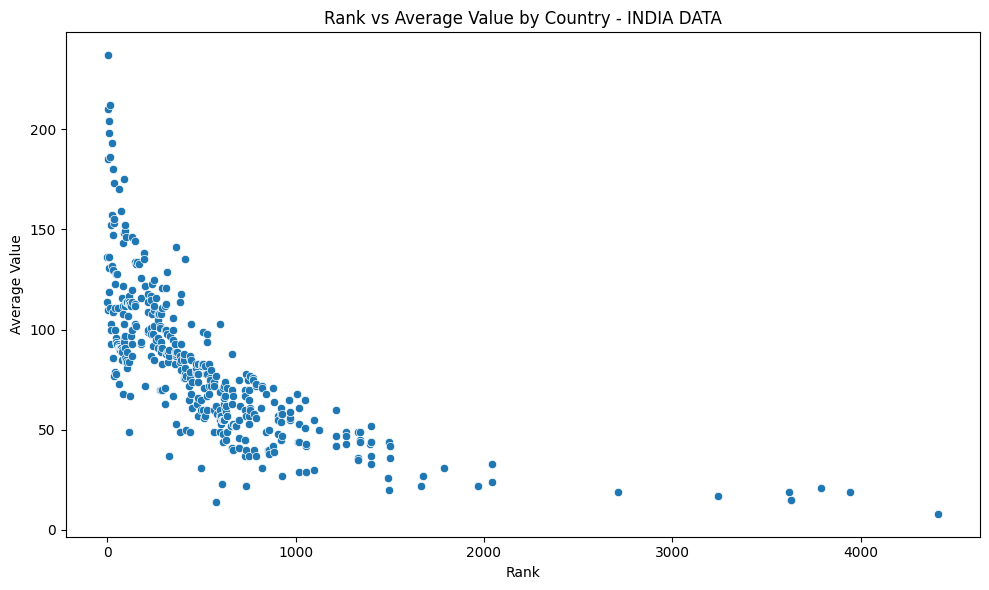

In [17]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=india_data, x='rank', y='oct')

# Add a title and labels
plt.title('Rank vs Average Value by Country - INDIA DATA')
plt.xlabel('Rank')
plt.ylabel('Average Value')

plt.tight_layout()  # Adjust layout to make room for rotated x labels
# Show the plot
plt.show()

### 3. Country Analysis

In [18]:
df_clean['Country'].value_counts()

Country
United States    801
Japan            499
China            445
India            427
Germany          214
                ... 
Mali               1
Egypt              1
Botswana           1
Monaco             1
Guatemala          1
Name: count, Length: 141, dtype: int64

<div style="background-color: #fff8ff; padding: 20px; border-radius: 10px; border: 1px solid #444555; font-family: Arial, sans-serif; color: #333333;">Since we have more than 5000 rows of AQI data from various cities, it is wise to first review the country insights in order to comprehend the high-level overview.</div>

In [19]:
# Group by 'Country' and calculate the average of 'Avg'
country_avg = df_clean.groupby('Country')['avg'].mean().reset_index()

# nlargest to get the top 20 countries based on 'avg'
top_countries = country_avg.nlargest(20, 'avg')

# nsmallest to get the bottom 20 countries based on 'avg'
bottom_countries = country_avg.nsmallest(20, 'avg')

In [20]:
country_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  141 non-null    object 
 1   avg      141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [21]:
print(country_avg)

           Country        avg
0      Afghanistan  19.000000
1          Albania  14.000000
2          Algeria  23.000000
3          Andorra  18.666667
4           Angola  14.400000
..             ...        ...
136  United States  19.553059
137     Uzbekistan  59.000000
138      Venezuela  10.000000
139        Vietnam  32.111111
140         Zambia  29.000000

[141 rows x 2 columns]


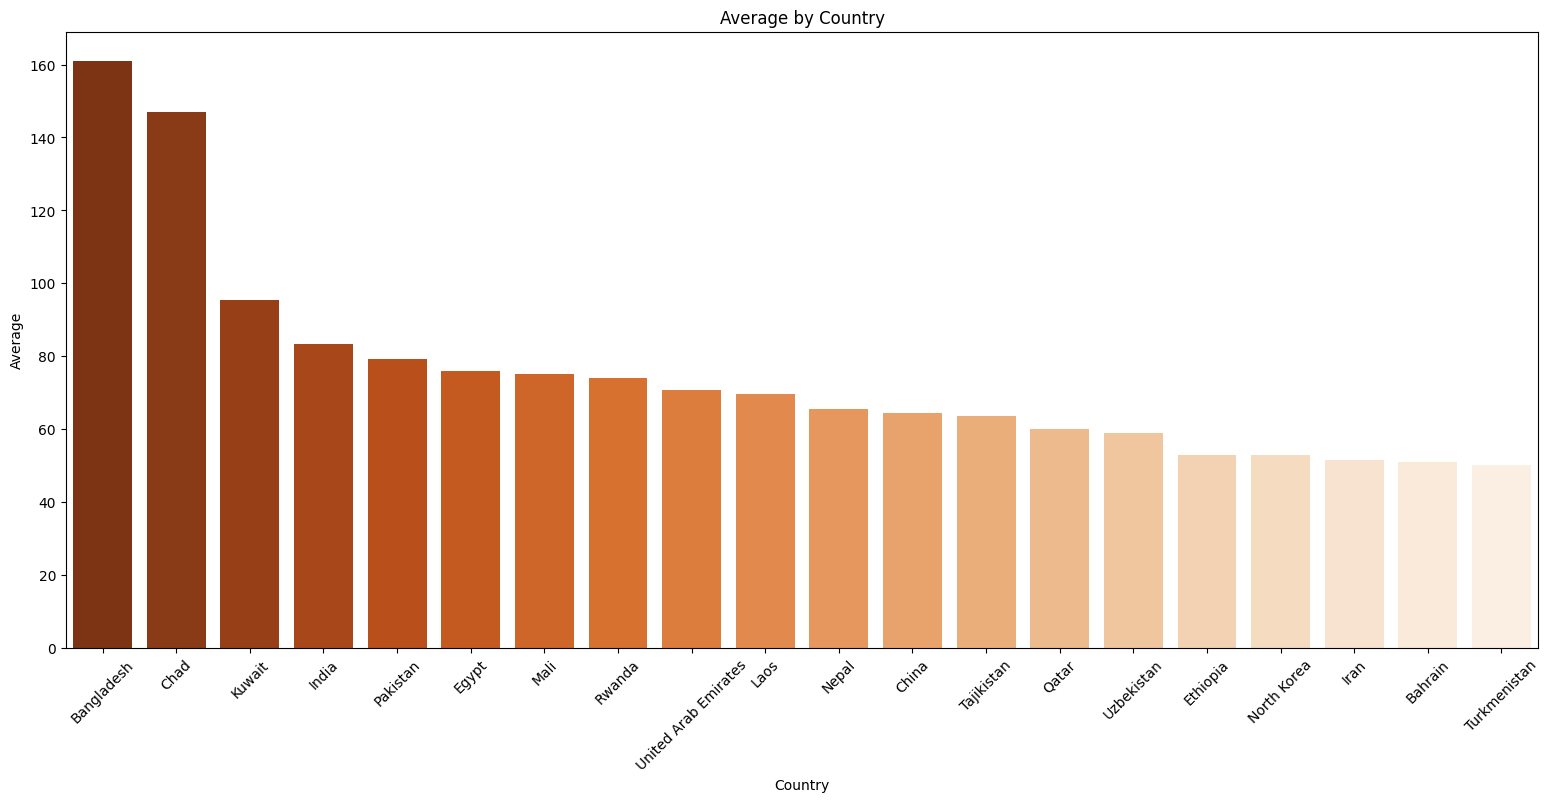

In [22]:
#Create a Bar Plot using Seaborn to show Top Countries with Highest AQI
plt.figure(figsize=(19,8))
sns.barplot(x='Country', y='avg', data=top_countries, palette='Oranges_r')
plt.xlabel('Country')
plt.ylabel('Average')
plt.title('Average by Country')
plt.xticks(rotation=45)
plt.show()

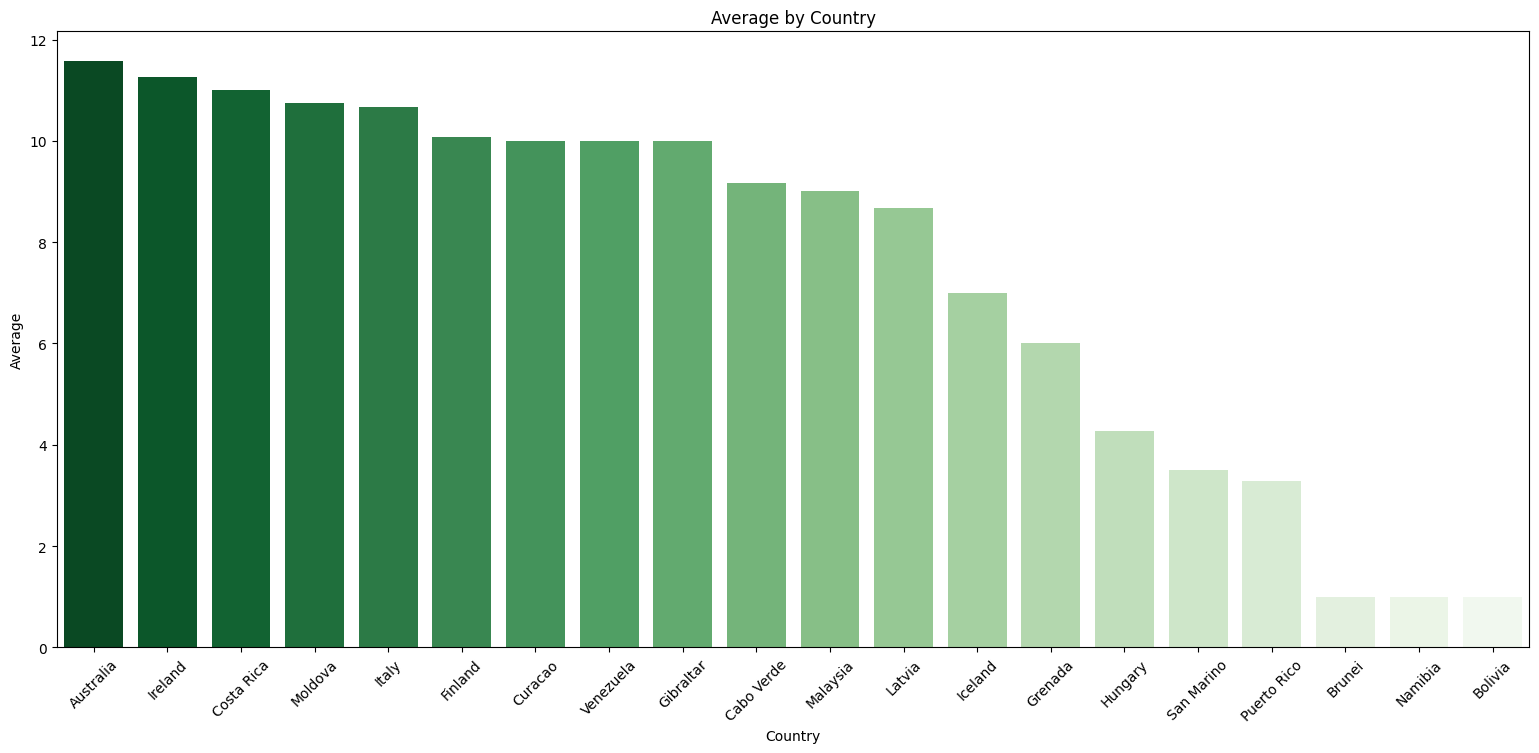

In [23]:
# Sort bottom_countries by 'avg' in ascending order for plotting
bottom_countries = bottom_countries.sort_values(by='avg', ascending=False)

#Create a Bar Plot using Seaborn to show Top Countries with Lowest AQI
plt.figure(figsize=(19,8))
sns.barplot(x='Country', y='avg', data=bottom_countries, palette='Greens_r')
plt.xlabel('Country')
plt.ylabel('Average')
plt.title('Average by Country')
plt.xticks(rotation=45)
plt.show()

### 4. City Analysis

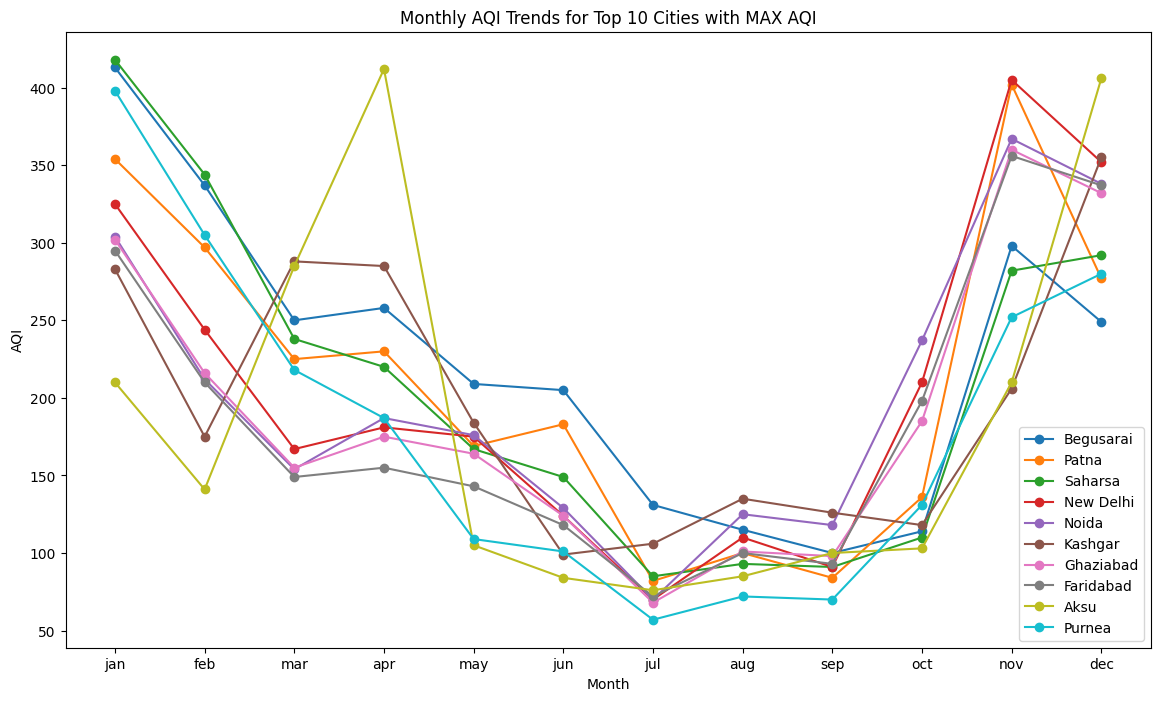

In [24]:
# Top 10 cities with highest average AQI
top_cities = df_clean.nlargest(10, 'avg')

# Plot monthly AQI trends
plt.figure(figsize=(14, 8))
for index, row in top_cities.iterrows():
    plt.plot(months, row[months], marker='o', label=row['city_name'])
    
plt.title('Monthly AQI Trends for Top 10 Cities with MAX AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.legend()
plt.show()

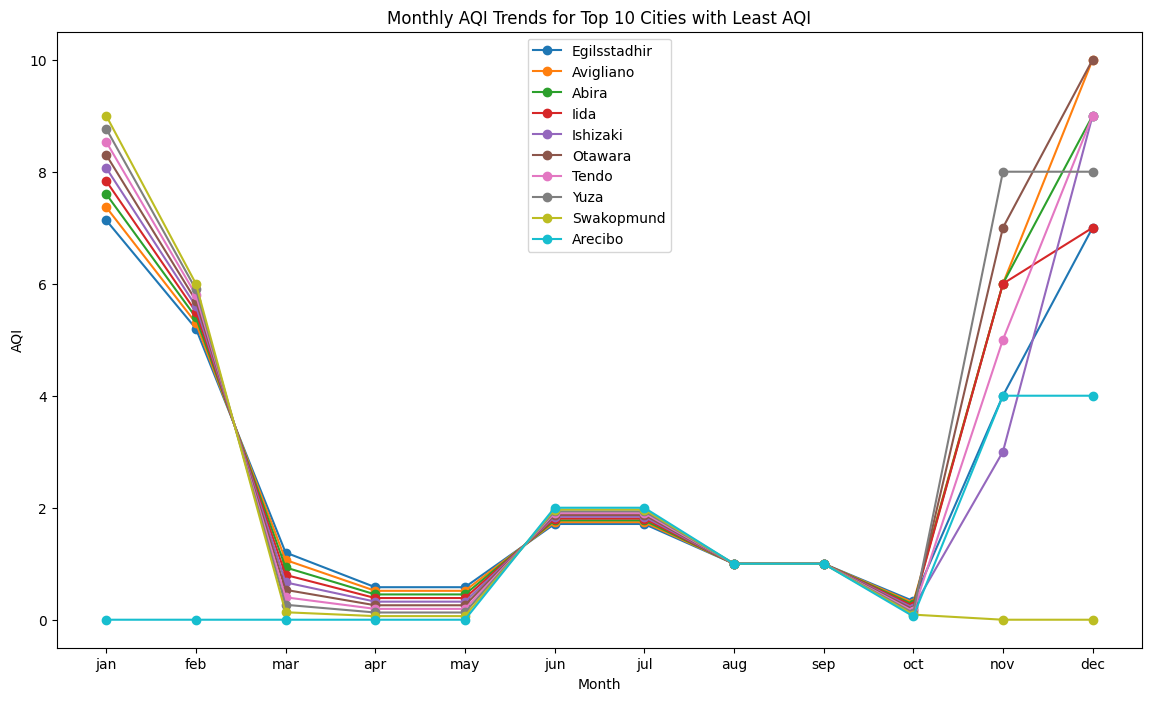

In [25]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Top 10 cities with Lowest average AQI
top_cities = df_clean.nsmallest(10, 'avg')

# Plot monthly AQI trends
plt.figure(figsize=(14, 8))
for index, row in top_cities.iterrows():
    plt.plot(months, row[months], marker='o', label=row['city_name'])
    
plt.title('Monthly AQI Trends for Top 10 Cities with Least AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.legend()
plt.show()

### 5. Data Visualization To Understand the Co-relation

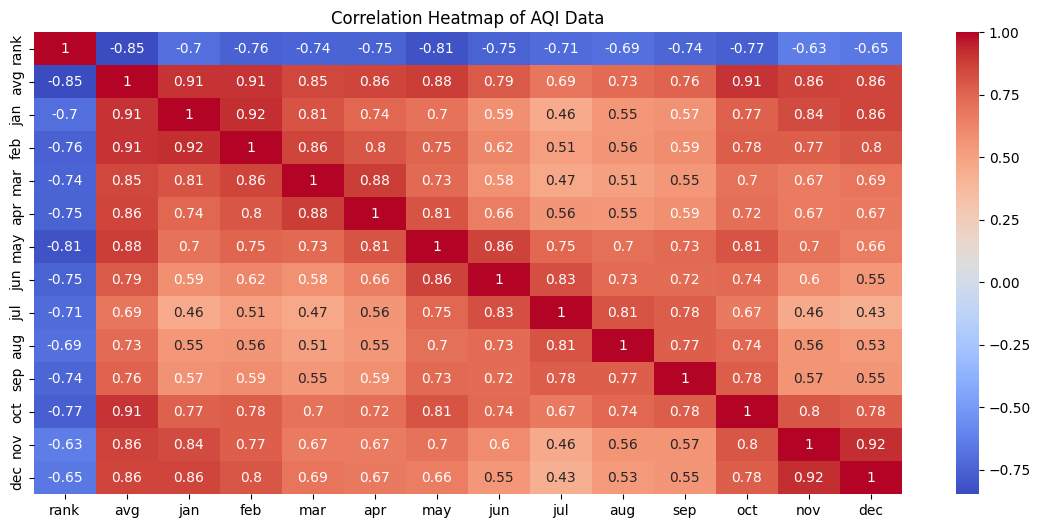

In [26]:
# Correlation heatmap for numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of AQI Data')
plt.show()

### Conclusion
Thus, we have performed data analytics on the provided AQI dataset using powerful Python libraries such as Pandas for data manipulation and cleaning, and Matplotlib & Seaborn for insightful visualizations. This analysis highlights key patterns and trends in air quality across regions, demonstrating the effectiveness of data science tools in environmental analytics.

<div style="background-color: #fff8ff; padding: 20px; border-radius: 10px; border: 1px solid #444555; font-family: Arial, sans-serif; color: #333333;">

  <h3 style="color: #444555; font-weight: bold;">If you found this notebook helpful, consider giving it an upvote! 👍</h3>
  <p style="font-size: 1.1em; color: #555555;">Your support encourages continued work in this domain. Feel free to leave your thoughts, feedback, or suggestions in the comments section. Let’s collaborate to make data science impactful!</p>

</div>